## Dependencies

 * Python 3.9 (might work with earlier versions too)
 * scipy
 * matplotlib

In [142]:
# import libraries
import math
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

%matplotlib inline

In [143]:
def soar2(x1, x2, L):
    '''
    function to compute correlation between two points x1, x2
    according to their separation
    
    uses a SOAR correlation function with length scale L
    (L = 0 => uncorrelated)

    rho = [1 + (dx/L)]*exp(-dx/L); dx = |x1-x2|
    '''

    d = abs(x1 - x2)
    if d == 0:
        return 1.0
    elif L > 0.0:
        return (1.0 + d/L) * math.exp(-d/L)
    else:
        return 0.0

In [144]:
# set x values at which equations are solved
x0 = 0.
xn = 10.
nx = 100 # will have nx+1 points
x = np.linspace(x0, xn, nx + 1)

In [145]:
# initialise analysis vectors
xdim = len(x)
a  = np.zeros(np.shape(x)) # analysis for 2 obs case
a1 = np.zeros(np.shape(x)) # analysis for o1 only case
a2 = np.zeros(np.shape(x)) # analysis for o2 only case

fb = 0.5 + 0.1 * np.sin(2 * math.pi * x/xn)
#print(fb)
#fb = np.zeros(np.shape(x)) # background

In [146]:
# default observation values and locations
x1 = 2.0; o1 = 1.0
x2 = 7.5; o2 = -1.0

In [152]:
# default covariances and correlation lengths
# forecast (background)
sigf = 1.0 # background error standard deviation
Lf   = 2.0 # correlation length scale
# observations
sigo = 1.0 # observation error standard deviation
Lo   = 1.0 # correlation length scale

In [153]:
# get value of background field at observation locations, Hxb

# Create a function that estimates the background at any point
# by interpolating linearly between the given background points
Hfb = interpolate.interp1d(x, fb, 'linear')

# Compute y-Hxb at each obs location
d1 = o1 - Hfb(x1)
d2 = o2 - Hfb(x2)

In [154]:
# Compute weighted correlation for each obs
cf12 = soar2(x1, x2, Lf) # background
co12 = soar2(x1, x2, Lo) # observations

C = sigf*sigf*cf12 + sigo*sigo*co12 # var_b*rho(x1,x2) + var_o*rho(x1,x2)

C = C/(sigf*sigf+sigo*sigo)         # [var_b*rho(x1,x2) + var_o*rho(x1,x2)]/[var_b+var_o]

W = (sigf*sigf+sigo*sigo)*(1.-C*C)

W = sigf*sigf/W 

# weight for a single ob:  var_b/(var_b+var_o)
W1 = sigf*sigf/(sigf*sigf+sigo*sigo)

In [155]:
# OI analysis

cf1 = np.array([soar2(xi, x1, Lf) for xi in x]) # rho(x,x1), (xdim x 1) vector
cf2 = np.array([soar2(xi, x2, Lf) for xi in x]) # rho(x,x2), (xdim x 1) vector
  
z = cf1*(d1-C*d2)+cf2*(d2-C*d1)

a  = fb + W*z        # analysis for 2 obs case
a1 = fb + cf1*W1*d1  # analysis for o1 only
a2 = fb + cf2*W1*d2  # analysis for o2 only

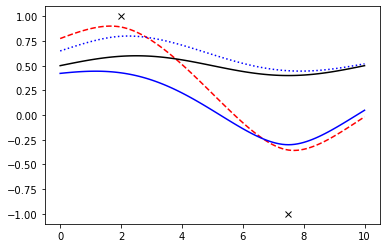

In [156]:
# Plot the data
fig = plt.figure()
plt.plot([x1, x2], [o1, o2], 'kx') # observation locations
plt.plot(x, a, 'r--')              # analysis in red dashed line
plt.plot(x, a1, 'b:')              # analysis with o1 only in blue dotted line
plt.plot(x, a2, 'b-')              # analysis with o2 only in blue dashed line
plt.plot(x, fb, 'k')               # background in black solid line
plt.show()